# Coping or Causing? The Global/Democratic Relationship Between Drugs, Alcohol, and Mental Illness
- Group: E2
- Date: 27-06-2025
- Course: Information Visualisation

- Authors:
   - Tide Benevento (15239349)
   - Sophie Gierstberg (15551490)
   - Sarah Out (15638472)
   - Palina Vasilyeva (15675548)



# Introduction
The connection between substance use and mental health has become increasingly relevant. More and more people turn to alcohol or drugs, not just for enjoyment or social reasons, but often to deal with deeper struggles. Whether it's stress, anxiety, or depression, substance use is sometimes seen as a quick escape or temporary relief.
But while these coping mechanisms may offer short-term comfort, the long-term effects are often more complex. In this data story, we explore whether there is a meaningful relationship between drug an alcohol use, and the prevelance of mentall illness across countries between 2000 and 2017.

**The first perspective suggests that countries with higher drug use also have higher rates of mental illnesses.**
Our first argument says that there is a strong positive correlation between drug use and anxiety levels. Our second argument states that there is a positive link between drug use and depression.

**The second perspective takes a different view: higher alcohol consumption goes hand in hand with higher mental illness rates, per country.**
Our first argument is that countries with higher overall alcohol consumption also report higher anxiety levels. The second argument focuses on depression, stating that higher alcohol consumption also relates to higher depression rates.

**A third viewpoint focuses on the role of democracy, saying that continents with stronger democratic values, show higher alcohol consumption and drug use.**
For this perspective, used the average democracy index per continent to keep the visualizations clear and interpretable. Countries with stronger democratic values often show higher alcohol consumption, as alcohol is more accessible, socially accepted and integrated into daily life (Inman et al., 2017). These freedoms may not directly cause more mental illness but can shape substance use patterns.
Our first argument states that there is a positive relationship between a higher democracy index and higher alcohol consumption rates. Our second argument says that countries with higher democratic values also tend to show higher levels of drug use.

In this datastory, we will find out how these different variables interact, and whether they reveal deeper patterns between substance use, mental health and the societies we live in.

# Dataset and Preprocessing


The first step that needs to be taken is finding a dataset or several datasets that provide the necessary information. For this project, this meant that it was necessary to find datasets that contained different types of alcohol consumption per country and per year, as well as a dataset that contained the mental health disorders per country. The last dataset we needed was a dataset containing the democratic index per continent. For completeness we chose to use the data from the period 2000 to 2017.




## Alcohol Consumption Dataset


We used data from Our World in Data, which has global statistics on alcohol consumption datasets (Ritchie & Roser, 2022). The original datasets can be found on and downloaded directly from the site https://ourworldindata.org/alcohol-consumption, if you go to the correct visualtion, click on table and then on download.


The following datasets were used:


*   **Total alcohol consumption per capita**


This dataset contains the average alcohol consumption per adult (15+ years old), measured in litres of pure alcohol, per year, per country.


*   **Beer consumption per capita**


This dataset provides the average beer consumption per adult, per year, measured in litres of pure alcohol, per country.
*   **Wine consumption per capita**


This dataset shows the average win consumption per adult, per year, measured in litres of pure alcohol, per country.
*   **Spirit consumption per capita**


Each dataset contained the variables country and year, along with either the specific type of alcohol consumption or the total consumption. We filtered in Excel to include only the years 2000 t0 2017, to prepare them for the merging step.


## Mental Health Dataset


The other dataset that needed to be found, was a dataset about mental illnesses per country. The most recent and reliable dataset that we could find can be downloaded from https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder. The data in this dataset ranges from 1991 to 2019. However, the data we needed were missing from the years 2018 and 2019, making 2017 the most recent year with correct values per country. We filtered the data to include the years 2000 to 2017, to match the timeframe of the alcohol datasets. This dataset contains the following variables:
*   Entity
*   Country code
*   Year
*   Schizophrenia (%)
*   Bipolar disorder (%)
*   Eating disorders (%)
*   Anxiety disorders (%)
*   Drug use disorders (%)
*   Depression (%)
*   Alcohol use disorders (%)


We need the Year and Entity variables to merge this dataset into our final clean dataset. Therefore, we selected these columns, along with the Depression (%), Drug use disorders (%), and Anxiety disorders (%) variables.


## Democratic dataset

We used data from https://www.idea.int/democracytracker/gsod-indices/, provided by the International Institute for Democracy and Electoral Assistance (IDEA). This dataset offers an overview of the democratic development of countries worldwide, across different dimensions of democracy. We selected the different continents and the four aspects of democracy over the time period of 2000 to 2017, resulting in a dataset with the following variables:
*   Year
*   Country / Region
*   Participation
*   Rule of Law
*   Rights
*   Representation

We computed the average score from these four aspects, using the avg formula in Excel (=AVERAGE(range:range)).

## Merging


All the aggregated and merged datasets were merged into the final ‘clean’ dataset and this is the dataset used for the data analysis. Because the alcohol datasets contained more countries than the mental health dataset, we chose to retain only the overlapping country - year combinations. This meant we only kept the rows for which we had data in all six datasets.


### Pseudocode


To merge the datasets, we used python code with the pandas package.

1.  Load all six datasets, (four alcohol consumption datasets, one mental health dataset and one democratic dataset)
2.  Filter all datasets to include only data from 2000 to 2017
3.  Rename and align key columns (e.g. 'Entity' -> 'Country')
4.  Select only the relevant columns from each dataset
5.  Identify the set of (country, year) combinations that are common to all datasets
6.  Filter each dataset to keep only those common combinations
7.  Merge all datasets on 'country' and 'year' into a single datagram
8.  Export the final merged dataframe to an Excel file


## Final Dataset


The final clean dataset, with the name 'Dataset_v1' contains the following variables:
*   Country
*   Year
*   Beer_consumption
*   Wine_consumption
*   Spirits_consumption
*   Total_alcohol_consumption
*   Depression_rate
*   Anxiety_rate
*   Drug_use_rate
*   Continent
*   Avg_democratic_index







# Visualisations

# Imports and data collection

In [ ]:
!pip install country_converter
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import country_converter as coco
from scipy.stats import linregress

import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))

df = pd.read_excel('Dataset_v1.xlsx')

Saving Dataset_v1.xlsx to Dataset_v1.xlsx


# Perspective 1 - Higher drug use has a positive relation with higher mental illness rates

## Argument 1 - There is a strong positive correlation between drug use and anxiety.
The Heatmap below uses shades of one colour to demonstrate the relation between Anxiety, Depression, and Drug Use. Each square block represents the correlation between each pair of the variables.

As shown with dark pink colour in the correlation heatmap below, there is a positive correlation between drug use and anxiety rates accross countries. The Pearson correlation coefficient (r) between the variables Drug_use_rate and Anxiety_rate is r = 0.58,  which indicates a moderately strong positive correlation (Turney, 2023).

This suggests that in countries where drug use is high, anxiety rates are also higher. While this does not imply causation, the consistent positive association across countries shows that there is a link between these two variables.


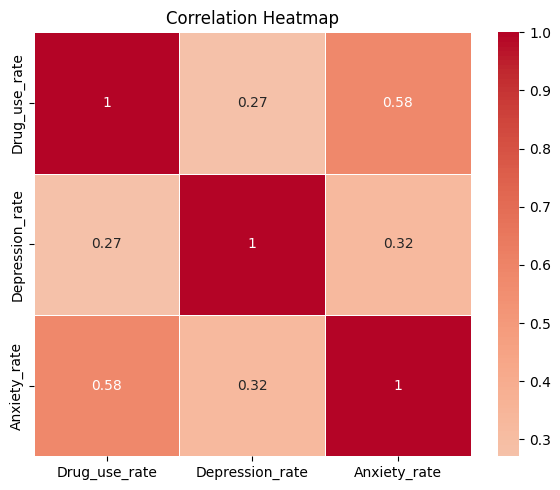

In [ ]:
# Laad je dataset
df = pd.read_excel('Dataset_v1.xlsx')

# Selecteer de relevante kolommen
columns = [
    'Drug_use_rate',
    'Depression_rate',
    'Anxiety_rate'
]

df_selected = df[columns]

# Bereken de correlatiematrix
corr_matrix = df_selected.corr()

# Plot de heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


## Argument 2 - More drug use is linked to higher depression rates

The correlation heatmap shows that the overall Pearson r between drug use and depression is +0.27, suggesting a weak positive relationship globally.

However, in the bar graph below we can see that the relationship per continent is negative in every region. Asia and Africa are the most negative, with a Pearson correlation coefficient (r) of r=-0.97 and r=-0.93, indicating a extreme negative correlation.

This contrast between global and regional patterns is an example of Simpson's paradox, where when data is split up in groups it reverses the original combined outcome.
In this case, large differences in average drug use and depression rates between continents cause the global correlation to appear weakly positive, even though the relationship is negative per contintent.
This shows that the link between drug use and depression is dependent on regional context.


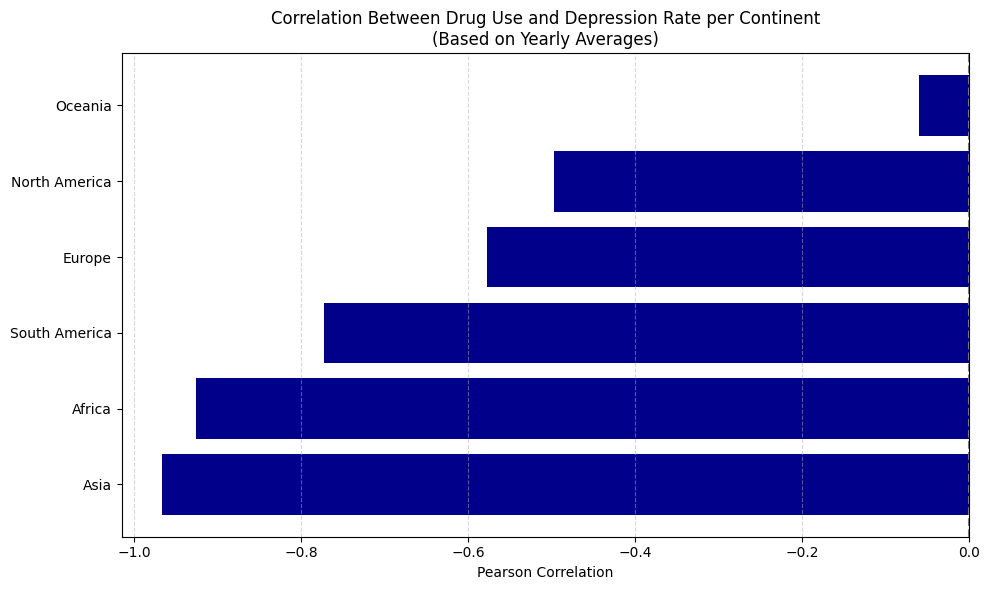

In [ ]:
df_clean = df.dropna(subset=['Continent', 'Year', 'Drug_use_rate', 'Depression_rate'])

df_yearly = df_clean.groupby(['Continent', 'Year'], as_index=False).agg({
    'Drug_use_rate': 'mean',
    'Depression_rate': 'mean'
})

correlations = []
for continent, group in df_yearly.groupby('Continent'):
    if len(group) >= 3:
        corr = group['Drug_use_rate'].corr(group['Depression_rate'])
        if pd.notna(corr):
            correlations.append({'Continent': continent, 'Correlation': corr})

df_corr = pd.DataFrame(correlations).sort_values(by='Correlation')

plt.figure(figsize=(10, 6))
bars = plt.barh(df_corr['Continent'], df_corr['Correlation'], color='darkblue')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Correlation Between Drug Use and Depression Rate per Continent\n(Based on Yearly Averages)')
plt.xlabel('Pearson Correlation')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# Perspective 2 - Higher alcohol consumption causes higher mental illness rates.


## Argument 1 - A high alcohol consumption rate has a positive relation with a higher anxiety rate.

The data provides mixed evidence regarding the proposed positive relationship between alcohol consumption and axniety rates.

In the choropleth where it displays the alcohol consumption per country, darker shades represent higher alcohol consumption levels. Countries across Europe, Notrh America and Oceania show relatively high alcohol intake. This is further enhanced by the time slider, which shows that this pattern is stable over the years.

In the choropleth displaying the anxiety rates per country, we see that some of these same regions, such as North America and parts of Western Europe, also report higher anxiety levels. However, this pattern is not universally consistent. For instance, some countries with low alcohol consumption in Africa and Asia also report moderate to high anxiety rates, and vice versa. The time slider again reveals no strong or consistent trend linking changes in alcohol consumption with anxiety levels over time.

In [ ]:
# Data inladen
df = pd.read_excel("Dataset_v1.xlsx")

# Alcohol fig
fig_alcohol = px.choropleth(df,
                            locations='Country',
                            locationmode='country names',
                            color='Total_alcohol_consumption',
                            color_continuous_scale='Oranges',
                            animation_frame='Year',
                            range_color=(0, df['Total_alcohol_consumption'].max()),
                            title='Alcohol Consumption per Country',
                            projection='natural earth')

# Zorg voor gelijke grootte → mooi gecentreerd
fig_alcohol.update_layout(width=800, height=500,  coloraxis_colorbar=dict(len=0.75, title='Alcohol (L/year)'))


# Anxiety fig
fig_anxiety = px.choropleth(df,
                            locations='Country',
                            locationmode='country names',
                            color='Anxiety_rate',
                            color_continuous_scale='Blues',
                            animation_frame='Year',
                            range_color=(0, 12),
                            title='Anxiety Rate per Country',
                            projection='natural earth')

fig_anxiety.update_layout(width=800, height=500, coloraxis_colorbar=dict(len=0.75, title='Anxiety (%/pop)'))



fig_alcohol.show()
fig_anxiety.show()

The line chart of regression lines per alcohol type vs. anxiety provides the clearest quantitative insight. It shows the wine and beer consumption display a notivable positive linear trend with anxiety rate: as consumption per capita increases, so does the anxiety rate. Wine in particular has the steepest slope and the largest confidence interval. Spirits consumption, however, appears to have a much weaker or nearly flat correlation with anxiety.

Taken together, the visualizations suggest that while there may be a positive association between certain types of alcohol and anxiety rates, this is not a universal pattern across all regions or all alcohol types.The geographic variation and time trends indicate that the relationship is likely complex and not conclusively supported by the visual data alone.

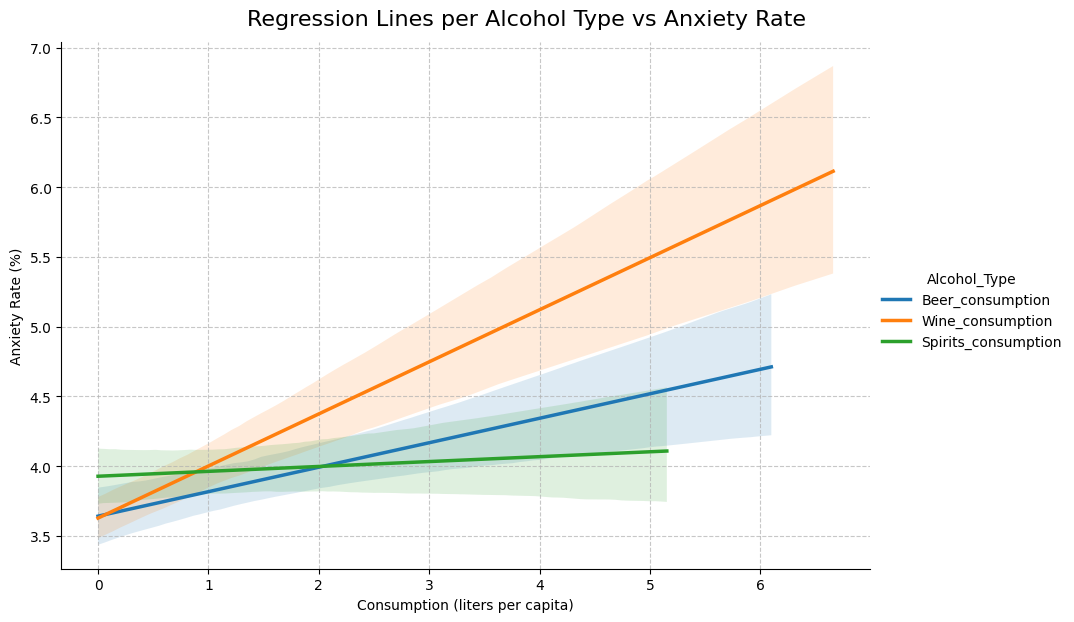

In [ ]:


# Dataset inladen
df = pd.read_excel("Dataset_v1.xlsx")
latest_df = df[df['Year'] == df['Year'].max()]

# Data long-form maken voor de plot
alcohol_long = latest_df.melt(id_vars=['Country', 'Anxiety_rate'],
                              value_vars=['Beer_consumption', 'Wine_consumption', 'Spirits_consumption'],
                              var_name='Alcohol_Type', value_name='Consumption')

# lmplot: regressielijnen per alcoholtype
g = sns.lmplot(data=alcohol_long,
               x='Consumption', y='Anxiety_rate',
               hue='Alcohol_Type',
               aspect=1.5, height=6,
               scatter=False,  # géén scatterpunten
               line_kws={'linewidth': 2.5})

# Labels & stijling
g.set_axis_labels("Consumption (liters per capita)", "Anxiety Rate (%)")
g.fig.suptitle("Regression Lines per Alcohol Type vs Anxiety Rate", fontsize=16, y=1.03)
plt.grid(True, linestyle='--', alpha=0.7)

# Plot tonen
plt.show()


## Argument 2 - Higher alcohol consumption has a relationship with higher depression rates per country.

# Perspective 3 - Democratic index has a relationship with alcohol consumption and drug use

## Argument 1 - There is a positive relationship between a higher democracy index and higher alcohol consumption rates.

The bubble and box graph suggest a possible positive relationship between democracy index and alcohol consumption, though this relationship is not consistent across all continents.
In the bubble chart, each continent is a bubble sized by average democracy index and positioned by total alcohol consumption. Over 17-years, larger bubbles like Europe and North America tend to appear higher, proposing a higher democratic index may link higher alcohol consumption. However, the limited vertical movement and moderate values for regions like South America and Oceania weaken this trend.

In [ ]:
df_clean = pd.read_excel("Dataset_v1.xlsx")

df_clean = df_clean.dropna(subset=['Continent', 'Total_alcohol_consumption', 'Avg_democratic_index'])

df_clean = df_clean[df_clean['Avg_democratic_index'].apply(lambda x: isinstance(x, (int, float)) and not pd.isna(x))]

# group by x-as = consumptie, y-as = continent, ballon = democratische score
df_agg = df_clean.groupby(['Continent', 'Year']).agg({
    'Total_alcohol_consumption': 'mean',
    'Avg_democratic_index': 'mean'
}).reset_index()


fig = px.scatter(
    df_agg,
    x='Continent',
    y='Total_alcohol_consumption',
    size='Avg_democratic_index',
    color='Continent',
    animation_frame='Year',
    animation_group='Continent',
    title='Alcohol Consumption by Continent (Bubble: Democratic Average Score)',
    labels={
        'Total_alcohol_consumption': 'Total Alcohol Consumption (Liters)',
        'Continent': 'Continent',
        'Avg_democratic_index': 'Average Score'
    },
    range_y=[0, df_agg['Total_alcohol_consumption'].max() + 1],
    size_max=40,
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    width=800,
    height=600,
    xaxis_title="Continent",
    yaxis_title="Total Alcohol Consumption (Liters)",
    showlegend=True,
    template='plotly_white',
    title_x=0.5,
    margin=dict(t=100, b=100, l=50, r=50)
)

fig.show()




The bar chart shows Europe leading in both democracy index and the average consumption of wine, beer, and spirits. North and South America also show moderate to high alcohol consumption with higher democracy scores, while Asia, with a lower democratic index, shows the lowest average alcohol consumption.
Overall, the data proposes a potential link between democracy and alcohol consumption, particularly in Europe. However, exceptions and limited variation in the bubble chart imply that the relationship is not conclusive across all regions.


In [ ]:

df_clean = df.dropna(subset=['Continent', 'Total_alcohol_consumption', 'Avg_democratic_index'])
df_clean = df_clean[df_clean['Avg_democratic_index'].apply(lambda x: isinstance(x, (int, float)) and not pd.isna(x))]

df_grouped = df_clean.groupby('Continent').agg({
    'Spirits_consumption': 'mean',
    'Wine_consumption': 'mean',
    'Beer_consumption': 'mean',
    'Avg_democratic_index': 'mean',

}).reset_index()

fig = go.Figure()

#wine bars
fig.add_trace(go.Bar(
    x=df_grouped['Continent'],
    y=df_grouped['Wine_consumption'],
    name='Wine Сonsumption(L)',
    yaxis='y',
    offsetgroup=0,
    marker_color='purple'
))
#spirits bars
fig.add_trace(go.Bar(
    x=df_grouped['Continent'],
    y=df_grouped['Spirits_consumption'],
    name='Spirits Consumption(L)',
    yaxis='y',
    offsetgroup=1,
    marker_color='steelblue'
))

#beer bars
fig.add_trace(go.Bar(
    x=df_grouped['Continent'],
    y=df_grouped['Beer_consumption'],
    name='Beer Сonsumption(L)',
    yaxis='y',
    offsetgroup=2,
    marker_color='blue'
))



# democratic index bars
fig.add_trace(go.Bar(
    x=df_grouped['Continent'],
    y=df_grouped['Avg_democratic_index'],
    name='Democracy Index (0–1)',
    yaxis='y2',
    offsetgroup=3,
    marker_color='orange'
))

fig.update_layout(
    title='Average Alcohol Consumption and Democracy Index by Continent',
    xaxis=dict(title='Continent'),
    yaxis=dict(
        title='Alcohol Consumption (Litres)',
        titlefont=dict(color='steelblue'),
        tickfont=dict(color='steelblue'),
        range=[0, df_grouped[['Spirits_consumption', 'Beer_consumption', 'Wine_consumption']].max().max() + 2],
        showgrid=False
    ),


    yaxis2=dict(
        title='Democracy Index (0–1)',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right',
        range=[0, 1],
        showgrid=False
    ),
    barmode='group',
    template='plotly_white',
    width=900,
    height=600,
    title_x=0.5
)

fig.show()

## Argument 2 - Higher democratic index has a relationship with higher drug use.

The violin plot shows average drug use rate between the years of 2000 and 2017 by continent, categorized by democracy index levels. Wider violins indicate more variation in the drug use rate. The most stable continent considering the average drug use rate is Oceania, this can be seen by the black bar in the middle of the Oceania violin, this shows where the majority of the data points lie. Europe shows the highest democratic index value and also shows a higher spread in drug use rates, suggesting greater variability. Overall, there seems to be no strong linear relation between the average drug use rates and the democratic index.


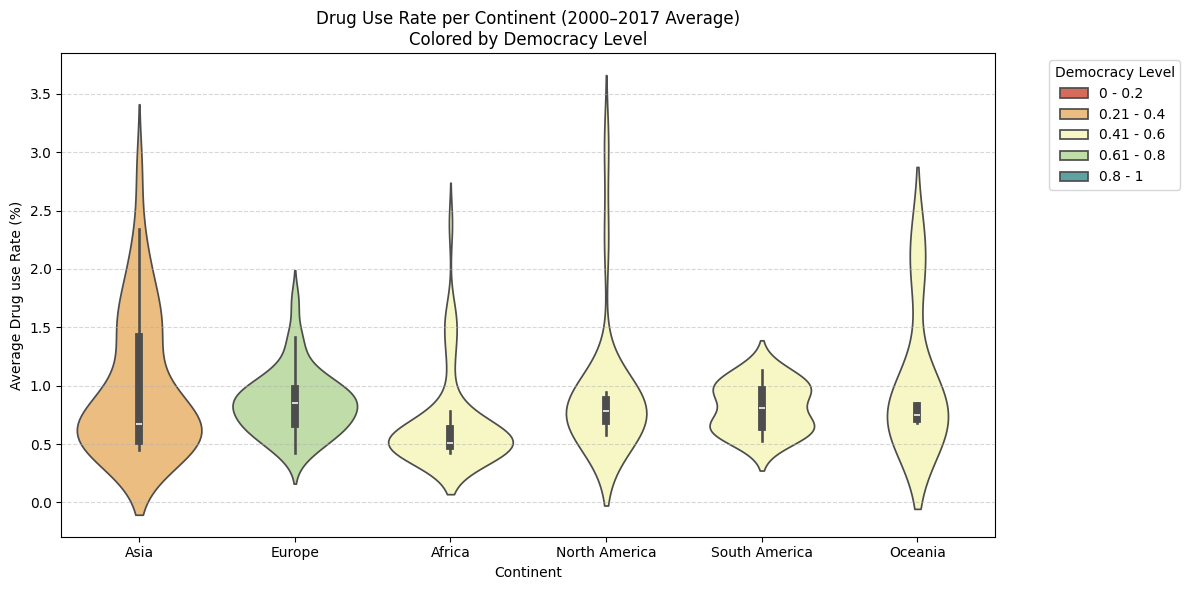

In [ ]:
df_clean = df.dropna(subset=['Continent', 'Avg_democratic_index', 'Drug_use_rate', 'Year'])
df_filtered = df_clean[(df_clean['Year'] >= 2000) & (df_clean['Year'] <= 2017)]


df_avg = df_filtered.groupby(['Country', 'Continent'], as_index=False).agg({
    'Avg_democratic_index': 'mean',
    'Drug_use_rate': 'mean'
})


bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0 - 0.2', '0.21 - 0.4', '0.41 - 0.6 ', '0.61 - 0.8', '0.8 - 1']
df_avg['Democracy_Level'] = pd.cut(df_avg['Avg_democratic_index'], bins=bins, labels=labels)


plt.figure(figsize=(12, 6))
sns.violinplot(
    x='Continent',
    y='Drug_use_rate',
    hue='Democracy_Level',
    data=df_avg,
    palette='Spectral'
)


plt.title('Drug Use Rate per Continent (2000–2017 Average)\nColored by Democracy Level')
plt.xlabel('Continent')
plt.ylabel('Average Drug use Rate (%)')
plt.legend(title='Democracy Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Summary

Our visualizations revealed a complex relationship between substance use, mental health and democracy from 2000 to 2017. We found a clear global link between higher drug use and increased anxiety, but the connection with depression varied by region. In fact, while the global data showed a weak positive correlation, regions like Asia and Africa showed strong negative ones, demonstrating how broader patterns can reverse on a local level.

Alcohol consumption showed mixed results. Some countries with high alcohol use also reported high anxiety, especially in Europe and North America, but this wasn't consistent worldwide. Wine and beer showed a stronger link to anxiety than spirits, suggesting that the type of alcohol matters.

Finally, countries with higher democracy scores tended to consume more alcohol, though this was not a universal rule. For drug use, no clear relationship with democracy was found, only regional differences. Overall, our findings highlight that these relationships are context-dependent and can't be generalized without considering local factors.

#Reflection

After submitting our data story draft, we had a feedback session with our TA and first-year students on Thursday, June 19th. One group member took notes during our presentation.
We received positive feedback for our progress. The TA and students noted that our perspectives were clear, and most graphs were well aligned with them.

Suggestions for improvement included:
- Fixing graph aesthetics, such as ensuring axes start at zero and values are fully visible.
- Replacing the drop-down menu in Graph 3 with side-by-side world maps for easier comparison.
- Combine the last two graphs into one graph containing the democratic index, alcohol consumption per continent between 2000 and 2017.

We agreed as a team to implement the changes stated above and worked on this in the week after receiving the feedback.


# Self-Reflection

Looking back on the entire project, it would have been more productive to have a standing appointment each week to work on the project together and be able to discuss the progress. Due to conflicting schedules, this was not possible with the entire group at the same time, but we made the best of the situation and kept in touch through texting.

Possibly, if given a longer period to finish the project we could have taken longer to find a more current dataset. As the dataset we have chosen to use, taken data entries from the year 2000 up until 2017. This was the most recent dataset that we could find from one of the reliable sources given in the project description for the data story.


# Work Distribution


During this project, our main form of communication consisted of group calls and texting in the group created for the project. After choosing the right datasets, initially two perspectives were created, but this turned into three perspectives. The third perspective was added to possibly give an explanation for the relations found in the first two perspectives. After cleaning and merging the two datasets, they were used to create graphs to visually show the relations between different variables selected to use when deciding the three perspectives.

**Sophie**

Sophie took the responsibility of finding the right datasets and cleaned the first dataset and merging the cleaned datasets. She also wrote the introduction, several arguments and checked the writing in the data story for mistakes in grammar and formulation. She also participated in making graphs and the overall design of the data story.

**Sarah**

Sarah took on the task of cleaning the second dataset. She created a graph for perspective 3 and took on the task of writing down the feedback given during the meeting with the TA and other first year students. Finally, she wrote the reflection, self reflection and the work distribution.

**Tide**

Tide worked on a few graphs for perspective 1 and wrote the arguments for it. He also made sure the colors were colorblind friendly.

**Palina**

Palina worked on implementing the feedback on perspective 3. This entailed making graph 5 more clear and adapting the arguments to the new graph. She also tried working out how to upload the data story to GitHub.



# References


-  Global State of Democracy Indices | The Global State of Democracy. (z.d.). https://www.idea.int/democracytracker/gsod-indices/


-  Global Trends in Mental health Disorder. (2022, 14 december). Kaggle. https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder



-  Inman, R. A., Da Silva, S. M. G., Bayoumi, R. R., & Hanel, P. H. P. (2017). Cultural Value Orientations and Alcohol Consumption in 74 Countries: A Societal-Level Analysis. Frontiers in Psychology, 8. https://doi.org/10.3389/fpsyg.2017.01963



-  Ritchie, H., & Roser, M. (2022, 1 januari). Alcohol consumption. Our World in Data. https://ourworldindata.org/alcohol-consumption


-  Turney, S. (2023, 13 maart). Pearson Correlatiecoëfficiënt (r) Berekenen en Interpreteren. Scribbr. https://www.scribbr.nl/statistiek/pearson-correlatie/
